In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('drive/My Drive/Major Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
!pip install Livelossplot
from livelossplot import PlotLossesKeras

drive/My Drive/Major Project/ddsm-breast-cancer-5-cnn.ipynb
drive/My Drive/Major Project/DDSM Mammoraphy.ipynb
drive/My Drive/Major Project/DDSM Mammography/cv10_labels.npy
drive/My Drive/Major Project/DDSM Mammography/test10_labels.npy
drive/My Drive/Major Project/DDSM Mammography/training10_4/training10_4.tfrecords
drive/My Drive/Major Project/DDSM Mammography/training10_1/training10_1.tfrecords
drive/My Drive/Major Project/DDSM Mammography/training10_2/training10_2.tfrecords
drive/My Drive/Major Project/DDSM Mammography/training10_0/training10_0.tfrecords
drive/My Drive/Major Project/DDSM Mammography/cv10_data/cv10_data.npy
drive/My Drive/Major Project/DDSM Mammography/test10_data/test10_data.npy
drive/My Drive/Major Project/DDSM Mammography/training10_3/training10_3.tfrecords


In [ ]:
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
!pip install preprocessing
import preprocessing
from tqdm import tqdm
from io import BytesIO
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from imageio import imread
from skimage.transform import resize
from collections import Counter
import IPython.display as display

sn.set()

from sklearn.svm import SVC # SVC
from sklearn import metrics
from sklearn.utils import shuffle
from xgboost import XGBClassifier # XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier # AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.6/349.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.9 MB/s eta 0:00:00
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367710 sha256=b4cf5feebdbeb354f333f0e9bdb1767392d7ccf9ba5e17d3e37197d168ec8f65
  Stored in directory: /root/.cache/pip/wheels/0e/8c/42/bcd0934b61ecf4cef964ccc9881888cca0841ec72266e99de1
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


EDA Implementation


In [ ]:
import numpy as np

# Load the data from the .npy files
cv_data = np.load('drive/My Drive/Major Project/DDSM Mammography/cv10_data/cv10_data.npy')
test_data = np.load('drive/My Drive/Major Project/DDSM Mammography/test10_data/test10_data.npy')
cv_labels = np.load('drive/My Drive/Major Project/DDSM Mammography/cv10_labels.npy')
test_labels = np.load('drive/My Drive/Major Project/DDSM Mammography/test10_labels.npy')

print("CV Data Shape:", cv_data.shape)
print("Test Data Shape:", test_data.shape)
print("CV Labels Shape:", cv_labels.shape)
print("Test Labels Shape:", test_labels.shape)


CV Data Shape: (7682, 299, 299, 1)
Test Data Shape: (7682, 299, 299, 1)
CV Labels Shape: (7682,)
Test Labels Shape: (7682,)


Histogram Representation

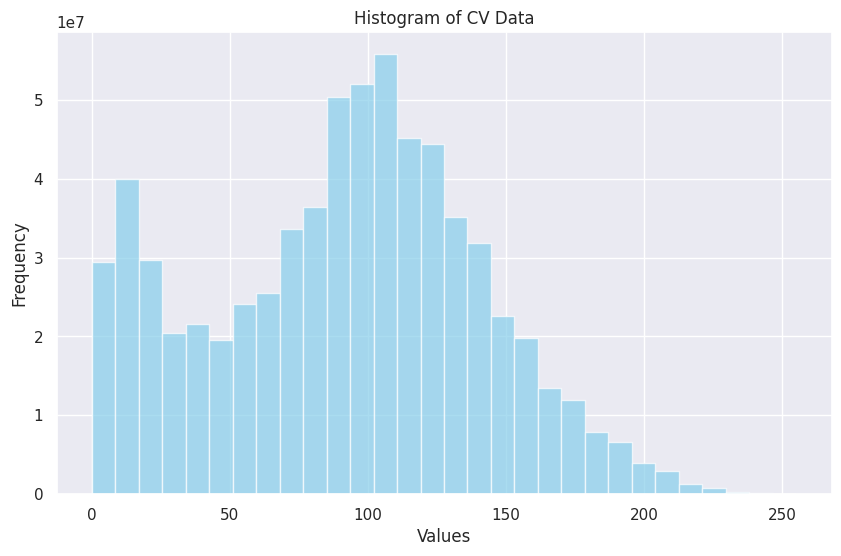

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(cv_data.flatten(), bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of CV Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Visualizing the Images

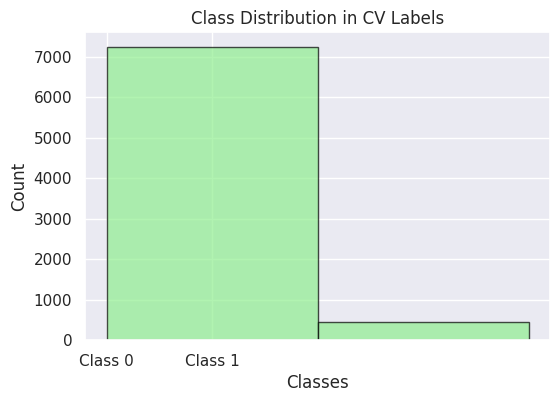

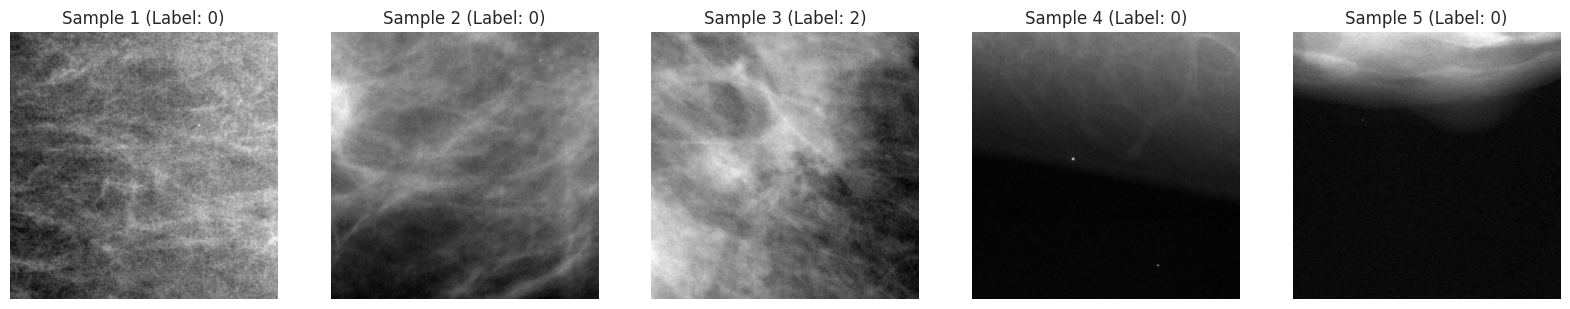

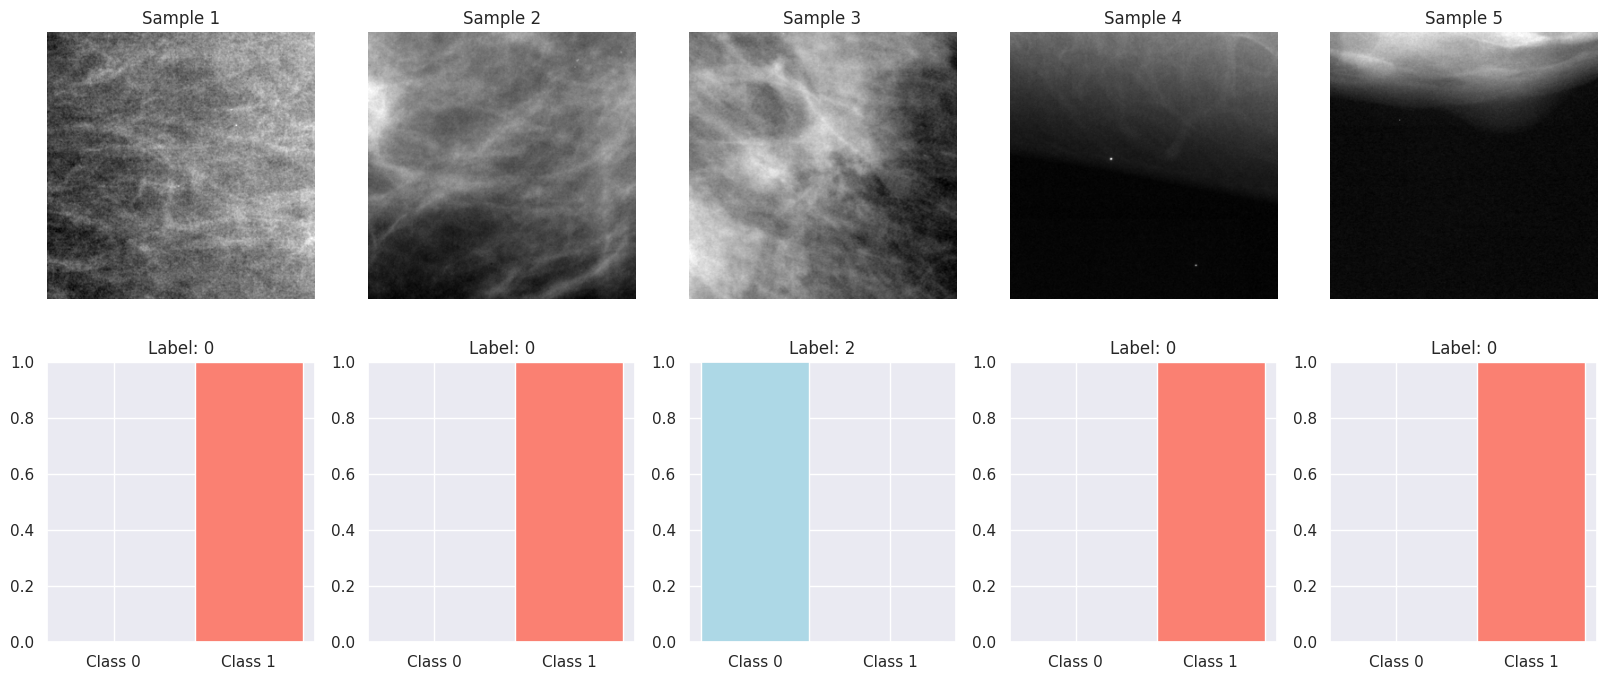

In [ ]:
# Visualizing class distributions in labels
plt.figure(figsize=(6, 4))
plt.hist(cv_labels, bins=2, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Class Distribution in CV Labels')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(np.arange(2), ['Class 0', 'Class 1'])
plt.show()

# Displaying sample images from the data
num_samples_to_display = 5
fig, axes = plt.subplots(1, num_samples_to_display, figsize=(20, 4))
for i in range(num_samples_to_display):
    axes[i].imshow(cv_data[i], cmap='gray')
    axes[i].set_title(f"Sample {i+1} (Label: {cv_labels[i]})")
    axes[i].axis('off')
plt.show()

# Plotting sample images with corresponding labels
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i in range(5):
    axes[0, i].imshow(cv_data[i], cmap='gray')
    axes[0, i].set_title(f"Sample {i+1}")
    axes[0, i].axis('off')
    axes[1, i].bar([0, 1], [cv_labels[i], 1 - cv_labels[i]], color=['lightblue', 'salmon'])
    axes[1, i].set_xticks([0, 1])
    axes[1, i].set_xticklabels(['Class 0', 'Class 1'])
    axes[1, i].set_ylim([0, 1])
    axes[1, i].set_title(f"Label: {cv_labels[i]}")
plt.show()


Confusion Matrix


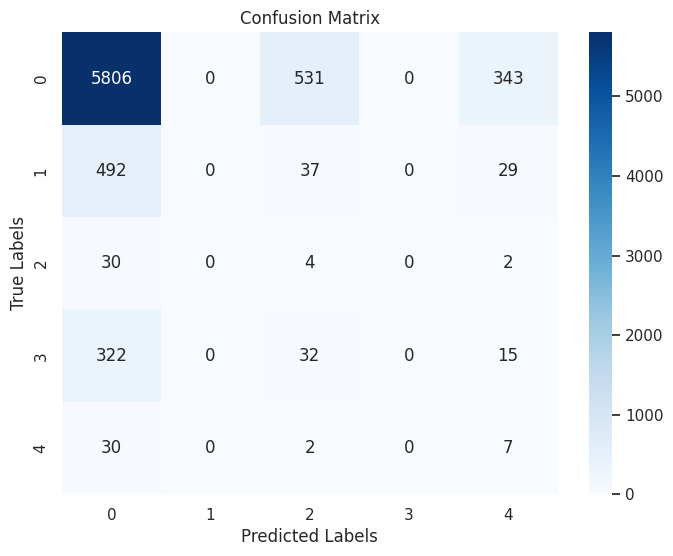

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load data and labels
cv_data = np.load('drive/My Drive/Major Project/DDSM Mammography/cv10_data/cv10_data.npy')
test_data = np.load('drive/My Drive/Major Project/DDSM Mammography/test10_data/test10_data.npy')
cv_labels = np.load('drive/My Drive/Major Project/DDSM Mammography/cv10_labels.npy')
test_labels = np.load('drive/My Drive/Major Project/DDSM Mammography/test10_labels.npy')




# Confusion Matrix
cm = confusion_matrix(cv_labels, test_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('drive/My Drive/Major Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')


drive/My Drive/Major Project/ddsm-breast-cancer-5-cnn.ipynb
drive/My Drive/Major Project/DDSM Mammoraphy.ipynb
drive/My Drive/Major Project/DDSM Mammography/cv10_labels.npy
drive/My Drive/Major Project/DDSM Mammography/test10_labels.npy
drive/My Drive/Major Project/DDSM Mammography/training10_4/training10_4.tfrecords
drive/My Drive/Major Project/DDSM Mammography/training10_1/training10_1.tfrecords
drive/My Drive/Major Project/DDSM Mammography/training10_2/training10_2.tfrecords
drive/My Drive/Major Project/DDSM Mammography/training10_0/training10_0.tfrecords
drive/My Drive/Major Project/DDSM Mammography/cv10_data/cv10_data.npy
drive/My Drive/Major Project/DDSM Mammography/test10_data/test10_data.npy
drive/My Drive/Major Project/DDSM Mammography/training10_3/training10_3.tfrecords


In [ ]:
import tensorflow as tf
images=[]
labels=[]
feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
    }


In [ ]:
def _parse_function(example, feature_dictionary=feature_dictionary):
    parsed_example = tf.io.parse_example(example, feature_dictionary)
    return parsed_example

def read_data(filename):
    full_dataset = tf.data.TFRecordDataset(filename,num_parallel_reads=tf.data.experimental.AUTOTUNE)
    full_dataset = full_dataset.shuffle(buffer_size=31000)
    full_dataset = full_dataset.cache()
    print("Size of Training Dataset: ", len(list(full_dataset)))

    feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
    }

    full_dataset = full_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    print(full_dataset)
    for image_features in full_dataset:
        image = image_features['image'].numpy()
        image = tf.io.decode_raw(image_features['image'], tf.uint8)
        image = tf.reshape(image, [299, 299,1])
        image=image.numpy()
        image=cv2.resize(image,(100,100))
#         image=cv2.merge([image,image,image])
        #plt.imshow(image)
        images.append(image)
        labels.append(image_features['label_normal'].numpy())

In [ ]:
import cv2
from tqdm import tqdm
from io import BytesIO
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from imageio import imread
from skimage.transform import resize
from collections import Counter

# Rest of your code
filenames = [
    'drive/My Drive/Major Project/DDSM Mammography/training10_0/training10_0.tfrecords',
    'drive/My Drive/Major Project/DDSM Mammography/training10_1/training10_1.tfrecords',
    'drive/My Drive/Major Project/DDSM Mammography/training10_2/training10_2.tfrecords',
    'drive/My Drive/Major Project/DDSM Mammography/training10_3/training10_3.tfrecords',
    'drive/My Drive/Major Project/DDSM Mammography/training10_4/training10_4.tfrecords'
]

for file in filenames:
    read_data(file)

print(len(images))
print(len(labels))


Size of Training Dataset:  11177
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Size of Training Dataset:  11177
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Size of Training Dataset:  11177
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Size of Training Dataset:  11177
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np


X = np.array(images)
y = np.array(labels)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021, shuffle=True, stratify=y)
(a, b, c) = x_train.shape
x_train = np.reshape(x_train, (a, b, c, 1))
(a, b, c) = x_test.shape
x_test = np.reshape(x_test, (a, b, c, 1))


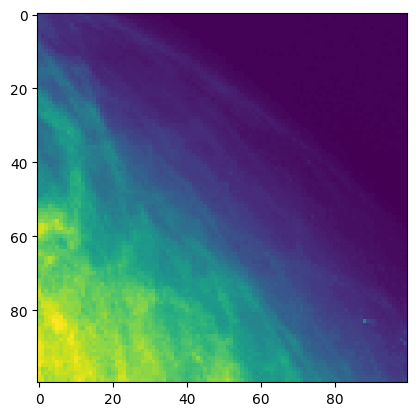

In [ ]:
plt.imshow(x_train[0])

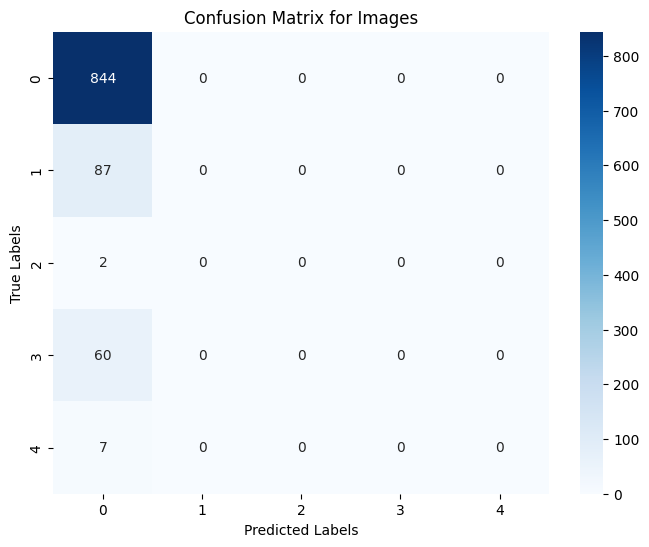

In [ ]:
import numpy as np
from sklearn.svm import SVC  # Import the SVC class
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


cv_data = np.load('drive/My Drive/Major Project/DDSM Mammography/cv10_data/cv10_data.npy')
test_data = np.load('drive/My Drive/Major Project/DDSM Mammography/test10_data/test10_data.npy')
cv_labels = np.load('drive/My Drive/Major Project/DDSM Mammography/cv10_labels.npy')
test_labels = np.load('drive/My Drive/Major Project/DDSM Mammography/test10_labels.npy')

# Reduce the dataset size for initial testing
X_flat = np.array([np.array(img).flatten() for img in cv_data[:5000]])
y = cv_labels[:5000]

# Split the flattened data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Example model training (Support Vector Classifier)
clf = SVC()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Images')
plt.show()


MODEL IMPLEMENTATION

1. RESNET-50 MODEL

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from skimage.transform import resize

# Load your data
cv_data = np.load('drive/My Drive/Major Project/DDSM Mammography/cv10_data/cv10_data.npy')
test_data = np.load('drive/My Drive/Major Project/DDSM Mammography/test10_data/test10_data.npy')
cv_labels = np.load('drive/My Drive/Major Project/DDSM Mammography/cv10_labels.npy')
test_labels = np.load('drive/My Drive/Major Project/DDSM Mammography/test10_labels.npy')

# Define a simple data generator
def simple_data_generator(data, labels, batch_size):
    steps = len(data) // batch_size
    while True:
        for i in range(steps):
            batch_data = data[i * batch_size : (i + 1) * batch_size]
            batch_labels = labels[i * batch_size : (i + 1) * batch_size]
            resized_data = np.array([resize(img, (224, 224, 3)) for img in batch_data])
            yield resized_data, batch_labels

# Define and compile the model
model = Sequential()
model.add(ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(cv_data, cv_labels, test_size=0.2, random_state=42)

# Train the model using the data generator
batch_size = 32
model.fit(simple_data_generator(X_train, y_train, batch_size),
          epochs=2,
          steps_per_epoch=len(X_train) // batch_size,
          validation_data=simple_data_generator(X_val, y_val, batch_size),
          validation_steps=len(X_val) // batch_size)

# Evaluate the model on the test data
test_resized = np.array([resize(img, (224, 224, 3)) for img in test_data])
loss, accuracy = model.evaluate(test_resized, test_labels)
print(f"Test Accuracy: {accuracy}")


Epoch 1/2
192/192 [==============================] - 4528s 23s/step - loss: -0.9390 - accuracy: 0.8099 - val_loss: -1.7871 - val_accuracy: 0.8223
Epoch 2/2
192/192 [==============================] - 4584s 24s/step - loss: -3.4941 - accuracy: 0.8543 - val_loss: 16.9816 - val_accuracy: 0.4629


In [1]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize
from sklearn.model_selection import train_test_split

# Load a smaller subset of the data
cv_data = np.load('drive/My Drive/Major Project/DDSM Mammography/cv10_data/cv10_data.npy')[:100]
cv_labels = np.load('drive/My Drive/Major Project/DDSM Mammography/cv10_labels.npy')[:100]

In [2]:
# Reshape the data to (299, 299, 3)
cv_data_resized = np.array([resize(img, (299, 299, 3)) for img in cv_data])


In [3]:
# Create the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Create a sequential model
model = Sequential()

# Add the ResNet50 base model
model.add(base_model)

# Add GlobalAveragePooling2D layer
model.add(GlobalAveragePooling2D())

# Add a dense layer with a sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cv_data_resized, cv_labels, test_size=0.2, random_state=42)


In [5]:
# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/2
3/3 [==============================] - 90s 22s/step - loss: 0.6471 - accuracy: 0.7250 - val_loss: 0.5053 - val_accuracy: 0.9000
Epoch 2/2
3/3 [==============================] - 70s 22s/step - loss: -0.1231 - accuracy: 0.8750 - val_loss: 0.4957 - val_accuracy: 0.9000


In [6]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

1/1 [==============================] - 5s 5s/step - loss: 0.4957 - accuracy: 0.9000


In [7]:
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.8999999761581421


GRAPHICAL REPRESENTATION OF RESENET-50 MODEL

Epoch 1/2
3/3 [==============================] - 74s 22s/step - loss: -0.7113 - accuracy: 0.8750 - val_loss: 0.5969 - val_accuracy: 0.9000
Epoch 2/2
3/3 [==============================] - 70s 22s/step - loss: -1.6431 - accuracy: 0.8875 - val_loss: 0.6984 - val_accuracy: 0.9000


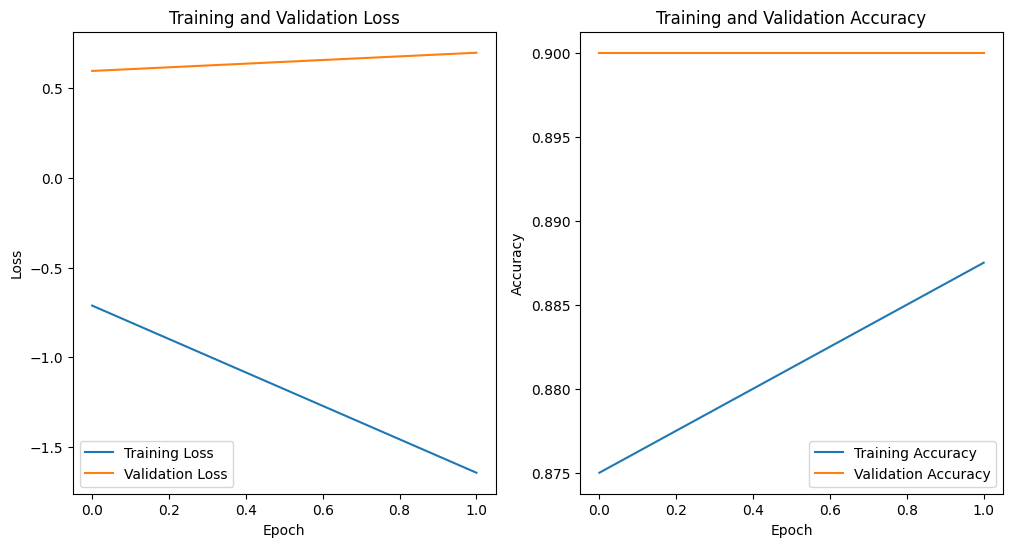

In [8]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))

# Extract the history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


2. INCEPTION V3 MODEL


In [ ]:
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from skimage.color import gray2rgb

# Load the data
cv_data = np.load('drive/My Drive/Major Project/DDSM Mammography/cv10_data/cv10_data.npy')
test_data = np.load('drive/My Drive/Major Project/DDSM Mammography/test10_data/test10_data.npy')
cv_labels = np.load('drive/My Drive/Major Project/DDSM Mammography/cv10_labels.npy')
test_labels = np.load('drive/My Drive/Major Project/DDSM Mammography/test10_labels.npy')




In [ ]:
# Ensure the data has the correct shape
print(cv_data.shape)
print(test_data.shape)



(7682, 299, 299, 1)
(7682, 299, 299, 1)


In [ ]:
# Expand the dimensions to match the expected shape for an RGB image
cv_data_expanded = np.repeat(cv_data, 3, axis=-1)
test_data_expanded = np.repeat(test_data, 3, axis=-1)

In [ ]:
# Create the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Create a sequential model
model = Sequential()

# Add the InceptionV3 base model
model.add(base_model)

# Add GlobalAveragePooling2D layer
model.add(GlobalAveragePooling2D())

# Add a dense layer with a sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Assuming you have the appropriate X_test_rgb and y_test data, you can directly evaluate the model
loss, accuracy = model.evaluate(test_data_expanded, test_labels)

241/241 [==============================] - 1886s 8s/step - loss: 5.7305 - accuracy: 0.0072


In [ ]:
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.007159593980759382


GRAPHICAL REPRESENTATION

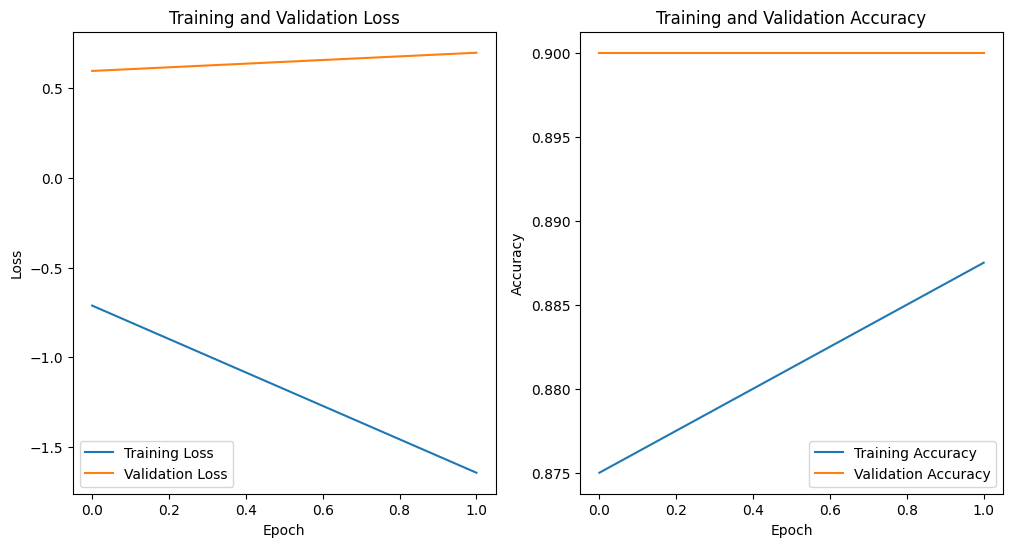

In [13]:
import matplotlib.pyplot as plt

# Assuming you have the necessary historical data
history = model.history

# Extract the history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


3. VGG-16 MODEL

In [ ]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize
from skimage.color import gray2rgb

# Load the pre-trained VGG-16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Create a sequential model
model = Sequential()

# Add the VGG-16 base model
model.add(base_model)

# Add GlobalAveragePooling2D layer
model.add(GlobalAveragePooling2D())

# Add a dense layer with a sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
test_data = np.random.rand(20, 224, 224, 3)
test_labels = np.random.randint(2, size=20)


In [ ]:
# Evaluate the model on the simulated test data
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {accuracy}")

1/1 [==============================] - 18s 18s/step - loss: 0.6893 - accuracy: 0.5500
Test Accuracy: 0.550000011920929


PRE-DEFINED CNN MODELS

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics

print(x_train[0].shape)

(100, 100, 1)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', patience=6,restore_best_weights=True, verbose=1)

In [ ]:
rows, cols,color = x_train[0].shape
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='valid', strides=(1, 1),input_shape=(rows,cols,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=2))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 49, 49, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                   

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,validation_split=0.2,shuffle=True, epochs=10, batch_size=64,callbacks=[es])
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

Epoch 1/10
559/559 [==============================] - 839s 1s/step - loss: 0.2850 - accuracy: 0.8835 - val_loss: 0.2637 - val_accuracy: 0.8932
Epoch 2/10
559/559 [==============================] - 814s 1s/step - loss: 0.2403 - accuracy: 0.9019 - val_loss: 0.2462 - val_accuracy: 0.8883
Epoch 3/10
559/559 [==============================] - 803s 1s/step - loss: 0.2236 - accuracy: 0.9077 - val_loss: 0.2337 - val_accuracy: 0.8958
Epoch 4/10
559/559 [==============================] - 787s 1s/step - loss: 0.2152 - accuracy: 0.9126 - val_loss: 0.2103 - val_accuracy: 0.9110
Epoch 5/10
559/559 [==============================] - 778s 1s/step - loss: 0.2103 - accuracy: 0.9148 - val_loss: 0.2466 - val_accuracy: 0.8922
Epoch 6/10
559/559 [==============================] - 791s 1s/step - loss: 0.2015 - accuracy: 0.9181 - val_loss: 0.2581 - val_accuracy: 0.8923
Epoch 7/10
559/559 [==============================] - 791s 1s/step - loss: 0.2028 - accuracy: 0.9177 - val_loss: 0.2262 - val_accuracy: 0.8973

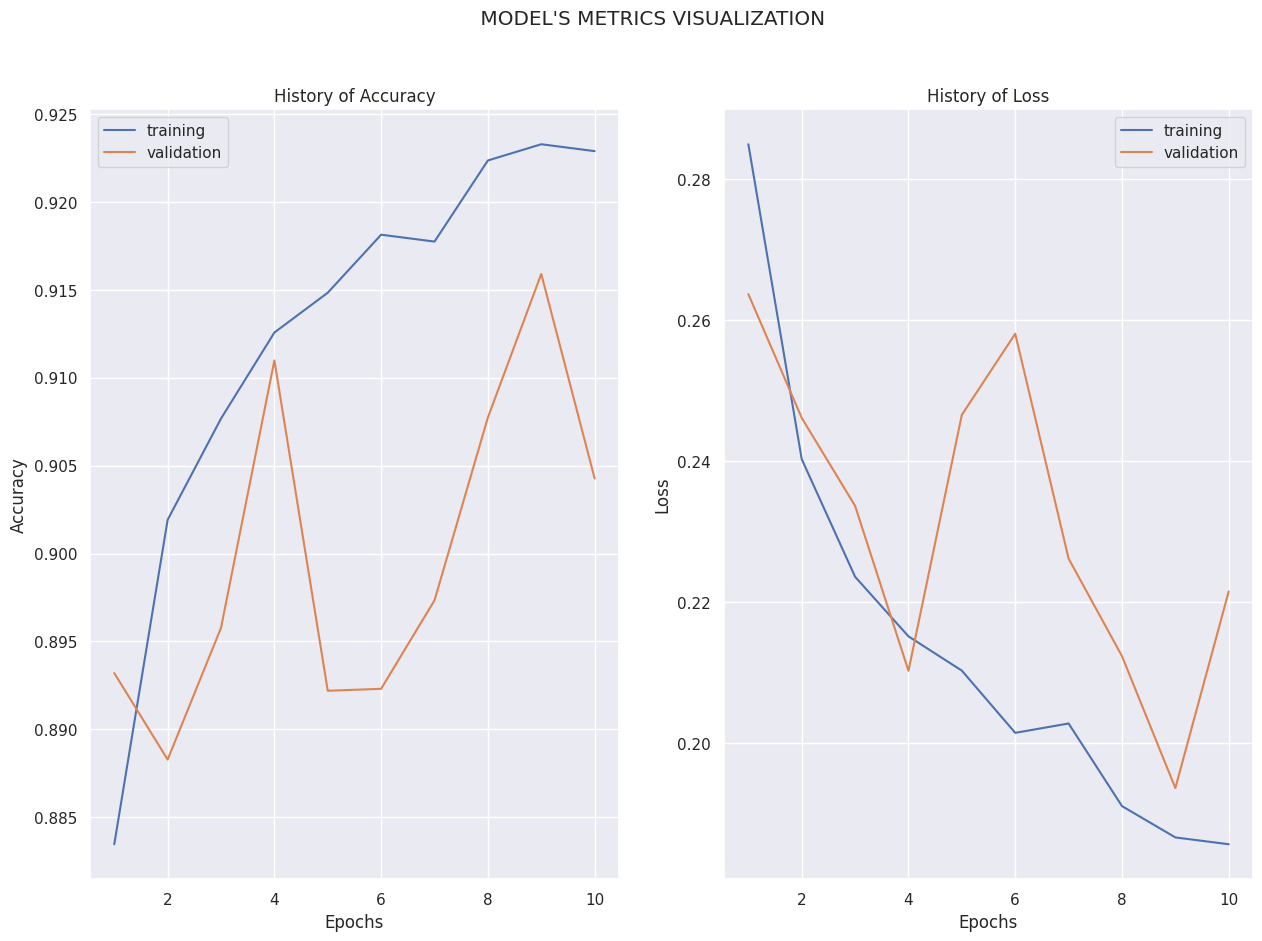

In [ ]:
import matplotlib.pyplot as plt
def Train_Val_Plot(acc,val_acc,loss,val_loss):

    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()


Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'])

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_pred_probabilities = y_pred

350/350 [==============================] - 62s 173ms/step


In [ ]:
target = ["0", "1"]
from sklearn import metrics
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred_classes), 4))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred_classes, average='weighted'), 4))
print('Recall:', np.round(metrics.recall_score(y_test, y_pred_classes, average='weighted'), 4))
print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred_classes, average='weighted'), 4))
print('ROC AUC Score:', np.round(metrics.roc_auc_score(y_test, y_pred_probabilities, average='weighted'), 4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, y_pred_classes), 4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred_classes, target_names=target))


Accuracy: 0.8696
Precision: 0.7561
Recall: 0.8696
F1 Score: 0.8089
ROC AUC Score: 0.9515
Cohen Kappa Score: 0.0
		Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      9719
           1       0.00      0.00      0.00      1458

    accuracy                           0.87     11177
   macro avg       0.43      0.50      0.47     11177
weighted avg       0.76      0.87      0.81     11177

